# Introduction to a Convolutional NN - classifying handwritten numbers:

For a long time, images were inaccesible to computers and ML algorithms. However, at the turn of the century very fast development - a slow revolution - happened, and the usage of Convolutional Neural Networks (CNNs) became computationally feasible. The advent of Graphical Processing Units (GPUs) also help propel the sharp rise in ML image analysis capabilities.

Through first the MNIST database (1998-2004), and then the PASCAL (2005-2010) and ImageNet (2010-2017) competitions, CNN code developed to become capable of classifying the content of images. The following is an exercise, which uses the famous MNIST dataset, containing about 70000 images of handwritten digits, reduced (and anti-aliased) to 28-by-28 pixel black-and-write images.

The CNN applied filters to these images, and then concatenates (i.e. "boils down") the images to lower resolution. This process is repeated, and finally the resulting pixel values are fed to a normal Neural Network, and made to provide an output, which lowers the loss function (in this case getting the value of the digit right). Through backpropagation, the filter values and the NN parameters are optimised, and thus in the end, the CNN becomes capable of evaluating images.

The code and comments below is meant to be part illustration, part exercise.

***

Authors: Carl Johnsen & Troels Petersen

Emails: cjjohnsen@nbi.ku.dk & petersen@nbi.dk

Date: 15th of May 2021 (latest version)

In [2]:
# Import standard libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import pandas as pd

# Keras documentation can be found on keras.io:
import tensorflow.keras
from tensorflow.keras.datasets import mnist      # NOTE: This loads the data!
# manual link to data:  http://yann.lecun.com/exdb/mnist/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split
import glob
from PIL import Image

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Load and prepare the MNIST dataset

In [3]:
im = Image.open('train/campanian/camp_11nov_4_fc80_20x_1.png')

In [128]:
path = ["campanian","corylus","dust","grimsvotn","qrobur","qsuber"]

In [ ]:
N = 256

path = ["campanian","corylus","dust","grimsvotn","qrobur","qsuber"]

n = 0

for i in path:
    n += len(glob.glob('train/'+i+'/*.png'))

             
labels = np.zeros(n)
data = np.zeros((n,N,N))
df = pd.DataFrame()
k = 0
l = 0
for j in path:
    files = glob.glob('train/'+j+'/*.png')
    l += 1
    for i in range(len(files)):
        k += 1
        im = Image.open(files[i]).resize((N,N))
        data[k] = np.asarray(im)
        labels[k] = l

#for i in range(len(files)):



In [5]:
N = 256

path = ["campanian","corylus","dust","grimsvotn","qrobur","qsuber"]

files1 = glob.glob('train/'+path[0]+'/*.png')
files1 = files1[:1000]
data_camp = np.zeros((len(files1),N,N))
for i in range(len(files1)):
    im = Image.open(files1[i]).resize((N,N))
    data_camp[i] = np.asarray(im)

In [7]:
files2 = glob.glob('train/'+path[1]+'/*.png')
files2 = files2[:1000]
data_cory = np.zeros((len(files2),N,N))
for i in range(len(files2)):
    im = Image.open(files2[i]).resize((N,N))
    data_cory[i] = np.asarray(im)

In [8]:
files3 = glob.glob('train/'+path[2]+'/*.png')
files3 = files3[:1000]
data_dust = np.zeros((len(files3),N,N))
for i in range(len(files3)):
    im = Image.open(files3[i]).resize((N,N))
    data_dust[i] = np.asarray(im)

In [9]:
files4 = glob.glob('train/'+path[3]+'/*.png')
files4 = files4[:1000]
data_grim = np.zeros((len(files4),N,N))
for i in range(len(files4)):
    im = Image.open(files4[i]).resize((N,N))
    data_grim[i] = np.asarray(im)

In [10]:
files5 = glob.glob('train/'+path[4]+'/*.png')
files5 = files5[:1000]
data_qro = np.zeros((len(files5),N,N))
for i in range(len(files5)):
    im = Image.open(files5[i]).resize((N,N))
    data_qro[i] = np.asarray(im)

In [11]:
files6 = glob.glob('train/'+path[5]+'/*.png')
files6 = files6[:1000]
data_qsu = np.zeros((len(files6),N,N))
for i in range(len(files6)):
    im = Image.open(files6[i]).resize((N,N))
    data_qsu[i] = np.asarray(im)

In [6]:
np.array([data_camp, data_cory]).shape

<ipython-input-6-3723da4b431a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array([data_camp, data_cory]).shape


(2,)

In [21]:
n = 0
path = ["campanian","corylus","dust","grimsvotn","qrobur","qsuber"]
for i in path:
    n += len(glob.glob('train/'+i+'/*.png'))

In [13]:
data = np.vstack((data_camp, data_cory, data_dust, data_grim, data_qro, data_qsu))

files = files1+files2+files3+files4+files5+files6

print(len(files))

names = []

for i in range(len(path)):
    for n in range(len(files)):
        names.append(path[i]+str(n))

#mapping = dict(names)
        
np.savez_compressed('data.npz', data_camp=data_camp, data_cory=data_cory, data_dust=data_dust, data_grim=data_grim, data_qro=data_qro, data_qsu=data_qsu)

In [6]:
data

In [13]:
data = np.load('data_codingset_onelist.npz')

In [33]:
camp = 0*np.ones((1,500)).T
cory = np.ones((1,500)).T
dust = 2*np.ones((1,500)).T
grim = 3*np.ones((1,500)).T
qro = 4*np.ones((1,500)).T
qso = 5*np.ones((1,500)).T

class_array = np.vstack([camp, cory, dust, grim, qro, qso])

In [139]:
train_images, val_images_, train_labels, val_labels_ = train_test_split(data['data'], class_array, test_size=0.6, random_state=13052020)

In [140]:
val_images, test_images, val_labels, test_labels = train_test_split(val_images_, val_labels_, test_size=0.5, random_state=13052020)

In [141]:
# the data, split between train and testval sets
#(train_images, train_labels), (testval_images, testval_labels) = data.load_data()

# further split testval set into specific test and validation set
# the test set is NOT used during any part but inference
#train_images, val_images, train_labels, val_labels = train_test_split(testval_images, testval_labels, test_size=0.2, random_state=13052020)

# explicitly illustrating standardization
def standardizeimg(img, mu, sigma):
    return (img-mu)/(sigma).astype(np.float32)

# save for scaling test data
mu_train = np.mean(train_images)
sigma_train = np.std(train_images)

# Standardize pixel distribution to have zero mean and unit variance
train_images = standardizeimg(img=train_images, mu=mu_train, sigma=sigma_train)
val_images = standardizeimg(img=val_images, mu=np.mean(val_images), sigma=np.std(val_images))

# adapt to format required by tensorflow; Using channels_last --> (n_samples, img_rows, img_cols, n_channels)
img_rows, img_cols = 256, 256 # input image dimensions
train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
val_images = val_images.reshape(val_images.shape[0], img_rows, img_cols, 1)

# convert class vectors to binary class matrices - one hot encoding
num_classes = 6
train_labels = tensorflow.keras.utils.to_categorical(train_labels, num_classes)
val_labels = tensorflow.keras.utils.to_categorical(val_labels, num_classes)

# avoid using statistics intrinsic to test data to ensure unbiased estimate of real model performance
test_images = standardizeimg(img=test_images, mu=mu_train, sigma=sigma_train)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
test_labels = tensorflow.keras.utils.to_categorical(test_labels, num_classes)

In [110]:
print(sigma_train)

37.086867378739


In [142]:
print("Training set:")
print(" > images:", train_images.shape)
print(" > labels:", train_labels.shape)
print("Validation set:")
print(" > images:", val_images.shape)
print(" > labels:", val_labels.shape)
print("Test set:")
print(" > images:", test_images.shape)
print(" > labels:", test_labels.shape)

Training set:
 > images: (1200, 256, 256, 1)
 > labels: (1200, 6)
Validation set:
 > images: (900, 256, 256, 1)
 > labels: (900, 6)
Test set:
 > images: (900, 256, 256, 1)
 > labels: (900, 6)


# Verify first 5 mages in each split dataset

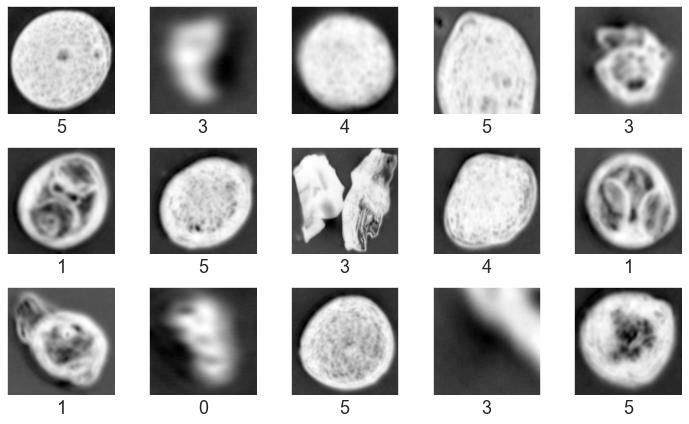

In [143]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(10,6))
for i in range(5):

    # train
    ax[0,i].imshow(train_images[i].reshape(256,256), cmap=plt.cm.binary)
    ax[0,i].set_xlabel(np.argmax(train_labels[i]), fontsize=18)
    ax[0,i].set_xticks([]); ax[0,i].set_yticks([]); ax[0,i].grid(False)
    # val
    ax[1,i].imshow(val_images[i].reshape(256,256), cmap=plt.cm.binary)
    ax[1,i].set_xlabel(np.argmax(val_labels[i]), fontsize=18)
    ax[1,i].set_xticks([]); ax[1,i].set_yticks([]); ax[1,i].grid(False)
    # test
    ax[2,i].imshow(test_images[i].reshape(256,256), cmap=plt.cm.binary)
    ax[2,i].set_xlabel(np.argmax(test_labels[i]), fontsize=18)
    ax[2,i].set_xticks([]); ax[2,i].set_yticks([]); ax[2,i].grid(False)
    
plt.tight_layout()
plt.show()

# Check for (un)balanced data

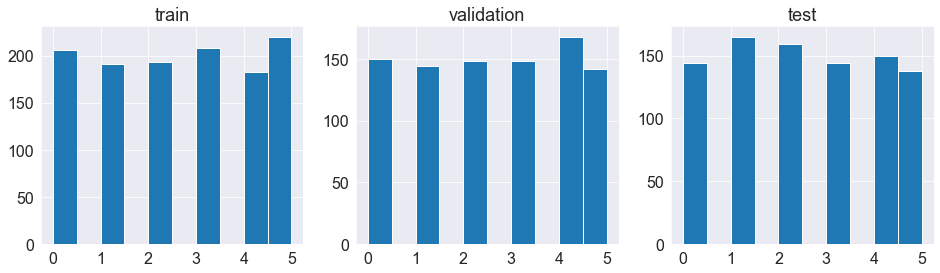

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
ax[0].hist(np.argmax(train_labels, axis=1).flatten()); ax[0].set_title('train', fontsize=18); ax[0].set_xticks(np.arange(6)); ax[0].tick_params(axis='both', which='major', labelsize=16);
ax[1].hist(np.argmax(val_labels, axis=1).flatten()); ax[1].set_title('validation', fontsize=18); ax[1].set_xticks(np.arange(6)); ax[1].tick_params(axis='both', which='major', labelsize=16);
ax[2].hist(np.argmax(test_labels, axis=1).flatten()); ax[2].set_title('test', fontsize=18); ax[2].set_xticks(np.arange(6)); ax[2].tick_params(axis='both', which='major', labelsize=16);
plt.show()

# Create architecture

See if you can also draw the below architecture, making it clear to others what exactly you've done/used.

In [147]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))

model.add(MaxPooling2D(pool_size=2, strides=None))

model.add(Conv2D(filters=64,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 activation='relu'))


model.add(MaxPooling2D(pool_size=2, strides=None))

model.add(Dropout(rate=0.20))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=128, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

# Compile and train model

In [148]:
# specify optimization strategy and metric used for monitoring during training
model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['categorical_accuracy'])

# the history object will contain a record of loss and metric values during training
history = model.fit(train_images, train_labels,
                    batch_size=128,
                    epochs=5,
                    verbose=1,
                    validation_data=(val_images, val_labels))

Epoch 1/5
10/10 [==============================] - 94s 9s/step - loss: 1.7608 - categorical_accuracy: 0.1890 - val_loss: 1.7222 - val_categorical_accuracy: 0.2300
Epoch 2/5
10/10 [==============================] - 88s 8s/step - loss: 1.7128 - categorical_accuracy: 0.2505 - val_loss: 1.6823 - val_categorical_accuracy: 0.2833
Epoch 3/5
10/10 [==============================] - 88s 9s/step - loss: 1.6814 - categorical_accuracy: 0.3034 - val_loss: 1.6485 - val_categorical_accuracy: 0.2656
Epoch 4/5
10/10 [==============================] - 99s 10s/step - loss: 1.6441 - categorical_accuracy: 0.3040 - val_loss: 1.6147 - val_categorical_accuracy: 0.2889
Epoch 5/5
10/10 [==============================] - 106s 11s/step - loss: 1.6063 - categorical_accuracy: 0.3292 - val_loss: 1.5896 - val_categorical_accuracy: 0.2933


# Inspect learned kernels

1st convolution layer:


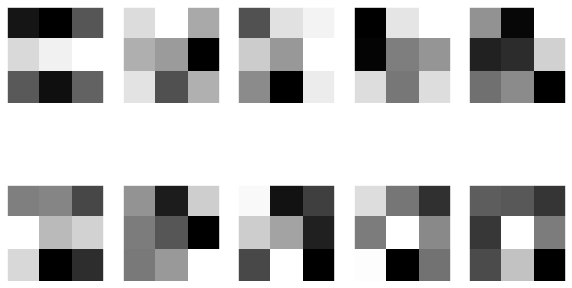

2nd convolution layer:


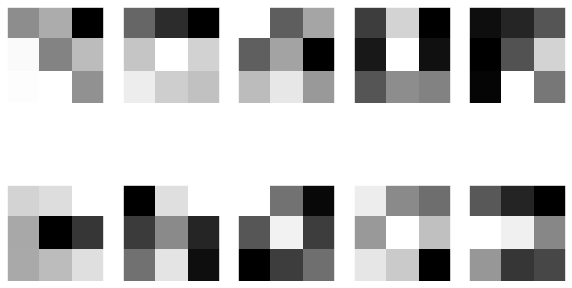

In [149]:
# model.layers will print a list of layer parameters/values
filters1, biases1 = model.layers[0].get_weights()
filters2, biases2 = model.layers[2].get_weights()

# normalize filter values to range 0-1 for better colormapping during plotting
def norm_filter(kernel):
    return (kernel - np.min(kernel)) / (np.max(kernel) - np.min(kernel))

print('1st convolution layer:')
fig, axs = plt.subplots(2,5, figsize=(10, 6))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(norm_filter(filters1[:,:,0,i]), cmap=plt.cm.binary)
    axs[i].set_xticks([]); axs[i].set_yticks([]); axs[i].grid(False)
plt.show()

print('2nd convolution layer:')
fig, axs = plt.subplots(2,5, figsize=(10, 6))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(norm_filter(filters2[:,:,0,i]), cmap=plt.cm.binary)
    axs[i].set_xticks([]); axs[i].set_yticks([]); axs[i].grid(False)

# Evaluate training process

29/29 - 10s - loss: 1.5896 - categorical_accuracy: 0.2933


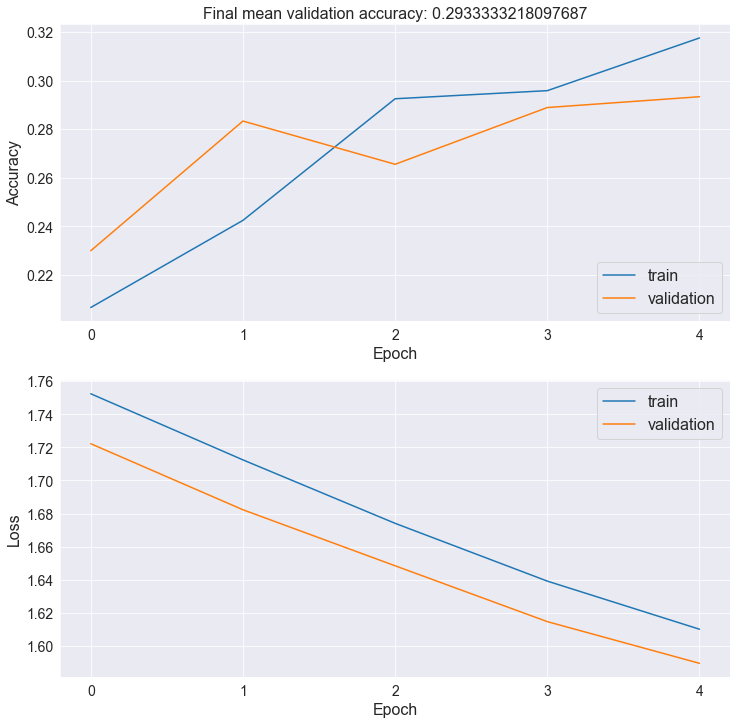

In [150]:
# evaluating model using all data (not in batches)
val_loss, val_acc = model.evaluate(val_images, val_labels, verbose=2)

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,12))
fs_L, fs_M, fs_S = 18, 16, 14
ax[0].plot(history.history['categorical_accuracy'], label='train')
ax[0].plot(history.history['val_categorical_accuracy'], label='validation')
ax[0].set_xlabel('Epoch', fontsize=fs_M)
ax[0].set_ylabel('Accuracy', fontsize=fs_M)
ax[0].tick_params(axis='both', which='major', labelsize=fs_S)
ax[0].set_title('Final mean validation accuracy: {}'.format(val_acc), fontsize=fs_M)
ax[0].set_xticks(range(0,5))
ax[0].legend(loc='lower right', fontsize=fs_M)

ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='validation')
ax[1].set_xlabel('Epoch', fontsize=fs_M)
ax[1].set_ylabel('Loss', fontsize=fs_M)
ax[1].tick_params(axis='both', which='major', labelsize=fs_S)
ax[1].set_xticks(range(0,5))
ax[1].legend(loc='upper right', fontsize=fs_M)

plt.show()

# Inference

In [151]:
# using until now unseen data
predicted_prob = model.predict(test_images)
predictions = np.argmax(predicted_prob, axis=1)

In [122]:
conf_matrix = tf.math.confusion_matrix(labels=np.argmax(test_labels, axis=1), predictions=predictions, num_classes=6)
print('Confusion Matrix: ', conf_matrix)

# Original code:
#sess = tf.compat.v1.InteractiveSession()
#conf_matrix = confusion.eval(session=sess)     # Needs update to new TF...
#sess.close()

# Accuracy score for inference
error_rate = (np.sum(conf_matrix)-np.sum(np.diag(conf_matrix))) / np.sum(np.diag(conf_matrix))
inf_acc = 1-error_rate

Confusion Matrix:  tf.Tensor(
[[128   0   0  11   2   3]
 [ 11  61   0  10  25  58]
 [137   0   0  18   4   0]
 [ 48   0   0  46   3  47]
 [  6   1   0   3  24 116]
 [  4   2   0   5   8 119]], shape=(6, 6), dtype=int32)


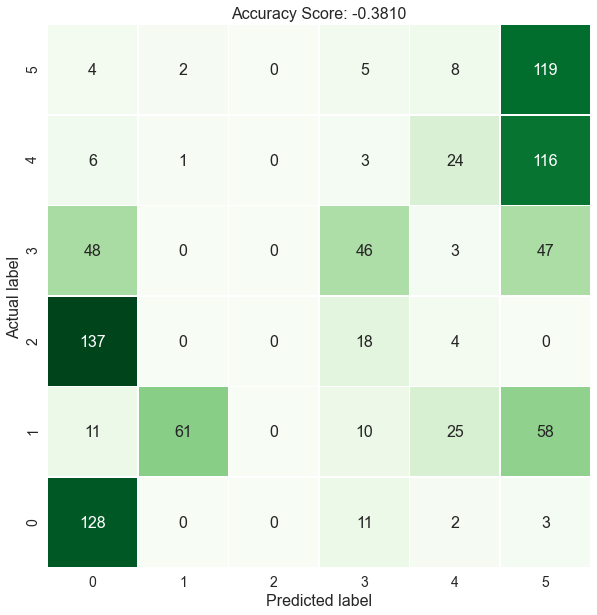

Correct: 378/900
Wrong: 522/900


In [123]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, fmt="d", linewidths=.5, square=True, cbar=False, cmap='Greens')
ax.invert_yaxis()
plt.ylabel('Actual label', fontsize=16)
plt.xlabel('Predicted label', fontsize=16)
plt.xticks(fontsize=14); plt.yticks(fontsize=14)
plt.title('Accuracy Score: {:.4f}'.format(inf_acc), fontsize=16)
plt.show()

print('Correct: {0}/{1}'.format(np.sum(np.diag(conf_matrix)),np.sum(conf_matrix)))
print('Wrong: {0}/{1}'.format((np.sum(conf_matrix)-np.sum(np.diag(conf_matrix))),np.sum(conf_matrix)))

# Inspection of predictions

### Correctly predicted images

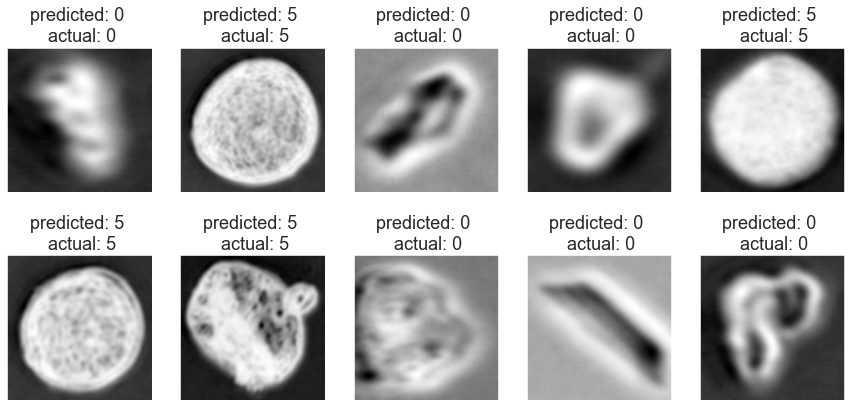

In [124]:
# show first 10 images that were correctly predicted
correct_idx = np.where(predictions == np.argmax(test_labels, axis=1))[0]

fig, axs = plt.subplots(2,5, figsize=(15, 7))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(test_images[correct_idx[i],:,:,0], cmap=plt.cm.binary)
    axs[i].set_title('predicted: {} \n actual: {}'.format(predictions[correct_idx[i]], np.argmax(test_labels, axis=1)[correct_idx[i]]), fontsize=18)
    axs[i].set_xticks([]); axs[i].set_yticks([]); axs[i].grid(False)

### Wrongly predicted images

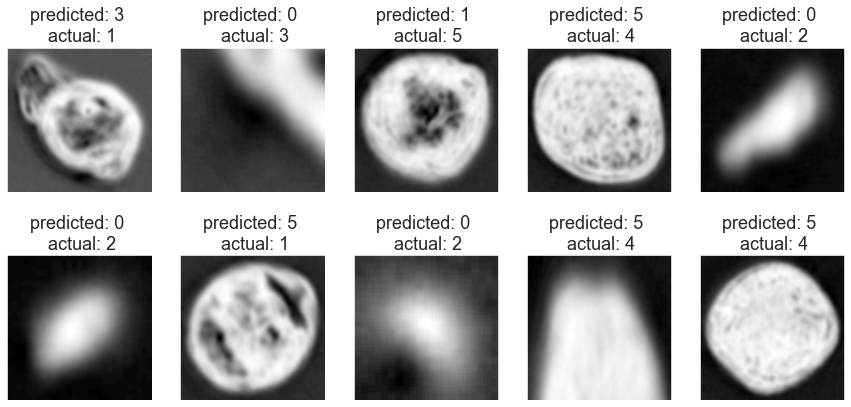

In [125]:
# Show first 10 images that were wrongly predicted:
wrong_idx = np.where(predictions != np.argmax(test_labels, axis=1))[0]

fig, axs = plt.subplots(2,5, figsize=(15, 7))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(test_images[wrong_idx[i],:,:,0], cmap=plt.cm.binary)
    axs[i].set_title('predicted: {} \n actual: {}'.format(predictions[wrong_idx[i]], np.argmax(test_labels, axis=1)[wrong_idx[i]]), fontsize=18)
    axs[i].set_xticks([]); axs[i].set_yticks([]); axs[i].grid(False)

In [135]:
print('Ash: camp, grim')
print('Pollen: cory, qro, qsu')
print(" ")
print(np.arange(6))
path

Ash: camp, grim
Pollen: cory, qro, qsu
 
[0 1 2 3 4 5]


['campanian', 'corylus', 'dust', 'grimsvotn', 'qrobur', 'qsuber']

### Final note:

This reflects a very simple and crude CNN model. Since MNIST is a relatively straightforward dataset, using a "larger" (i.e. full scale) CNN model, you should expect even better results! However, the real test is, if you can apply the above approach to another more complicated dataset.

Also, as the size of the problem grows (larger images!!!), the use of GPUs becomes necessary. They are typically a factor 50-100 faster.